In [64]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RXGate, CRZGate
from qiskit.visualization import plot_distribution
import numpy as np, matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

The *Quantum Zeno Effect* is closely related to *Zeno's Arrow of Time Paradox,* which argues that an arrow in flight is always at rest at every snapshot of time. This is easlily resolved by considering the fact that the arrow is at a different point in space at each moment, and the arrow possesses a nonzero speed throughout nondiscretized or continuous time. 

The Quantum Zeno Effect occurs when an unstable quantum system is **continuously** observed, causing it to remain in its initial state preventing evolution. This is analogous to the arrow paradox, where the arrow is continuously observed, causing it to remain at rest. 

We can consider the arrow in its upward state as $\ket{0}$ and downward state as $\ket{1}$. The arrow is in a superposition of these states, and the act of observing the arrow causes the superposition to collapse into one of the states. If continuously observed, it will remain in the same state. We also take into account **time-evolution,** wherein the arrow evolves to the opposite state, and the probability of collapse into a certain state **depends** upon the time elapsed.

Like this, we can continuously observe the arrow in its $\ket{1}$ state to prevent evolution.

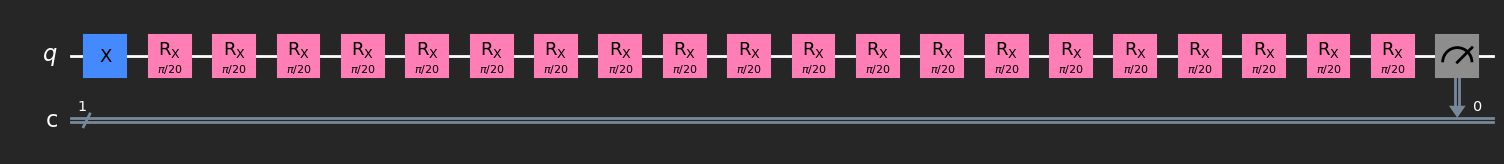

In [40]:
timesteps = int(input("Enter the number of timesteps: "))      
theta = np.pi / timesteps

qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(1, 'c')

qc = QuantumCircuit(qr, cr)
qc.x(0)

for timestep in range(timesteps):
    qc.append(RXGate(theta), [qr[0]])

qc.measure(qr[0], cr[0])
qc.draw('mpl', style = 'iqx-dark')

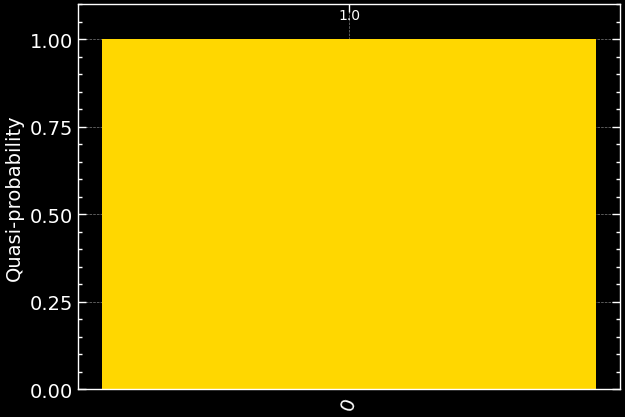

In [41]:
simulator = AerSimulator()
job = simulator.run(qc)
counts = job.result().get_counts()

plot_distribution(counts, color = 'gold')   

# Considering Evolution:

Text(0.5, 1.0, 'State evolution w/o Zeno Effect')

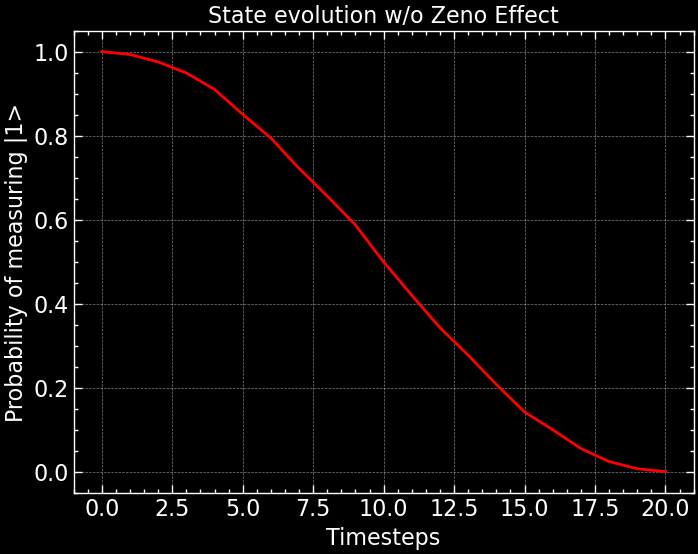

In [42]:
x_v = range(timesteps + 1)
y_v = list()

for timestep in range(timesteps + 1):
    qc_evolve = QuantumCircuit(qr, cr)
    qc_evolve.x(0)

    for time_step in range(timestep):
        qc_evolve.append(RXGate(theta), [qr[0]])
        
    qc_evolve.measure(qr[0], cr[0])

    shots = 10000
    job = simulator.run(qc_evolve, shots = shots)
    counts = job.result().get_counts()
        
    if '1' in counts:
        y_v.append(counts['1'] / shots)
    else:
         y_v.append(0)

plt.plot(x_v, y_v, color = 'red')
plt.xlabel('Timesteps')
plt.ylabel('Probability of measuring |1>')
plt.title('State evolution w/o Zeno Effect')

If we measure each time after $x$-rotation...

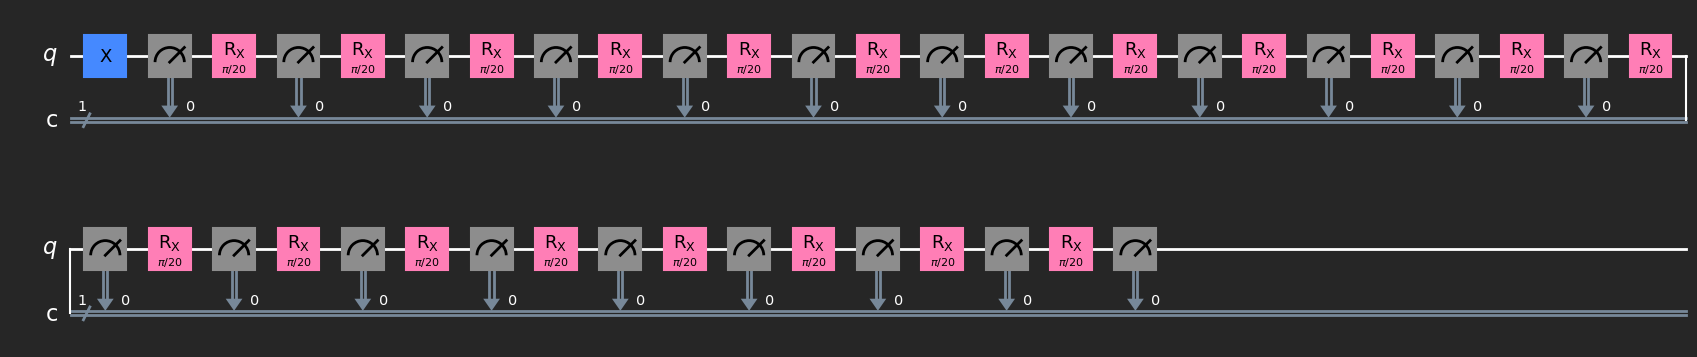

In [43]:
x_v_zeno = range(timesteps + 1)
y_v_zeno = list()

for timestep in range(timesteps + 1):
    qc_zeno = QuantumCircuit(qr, cr)
    qc_zeno.x(0)

    for time_step in range(timestep):
        qc_zeno.measure(qr[0], cr[0])
        qc_zeno.append(RXGate(theta), [qr[0]])

    qc_zeno.measure(qr[0], cr[0])

    shots = 10000
    job = simulator.run(qc_zeno, shots = shots)
    counts = job.result().get_counts()
        
    if '1' in counts:
        y_v_zeno.append(counts['1'] / shots)
    else:
        y_v_zeno.append(0)

qc_zeno.draw('mpl', style = 'iqx-dark')

Text(0.5, 1.0, 'State evolution w/(o) Zeno Effect')

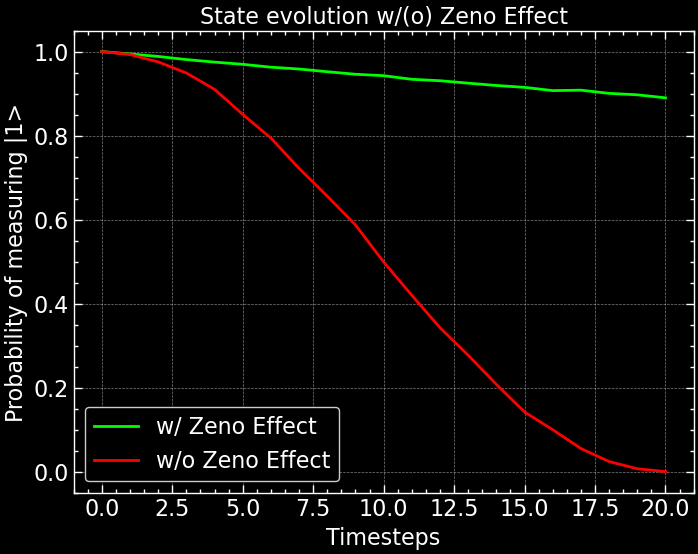

In [46]:
plt.plot(x_v_zeno, y_v_zeno, color = 'lime', label = 'w/ Zeno Effect')
plt.plot(x_v, y_v, color = 'red', label = 'w/o Zeno Effect')   

plt.legend(['w/ Zeno Effect', 'w/o Zeno Effect'])
plt.xlabel('Timesteps')
plt.ylabel('Probability of measuring |1>')
plt.title('State evolution w/(o) Zeno Effect')

With Zeno's Effect, the probability of the arrow being in the $\ket{1}$ state is pretty high for low enough timesteps and decays almost linearly, as opposed to exponential decay in the absence of observation.

# Running on an IBM Quantum Computer:

Text(0.5, 1.0, 'State evolution w/(o) Zeno Effect (On QC)')

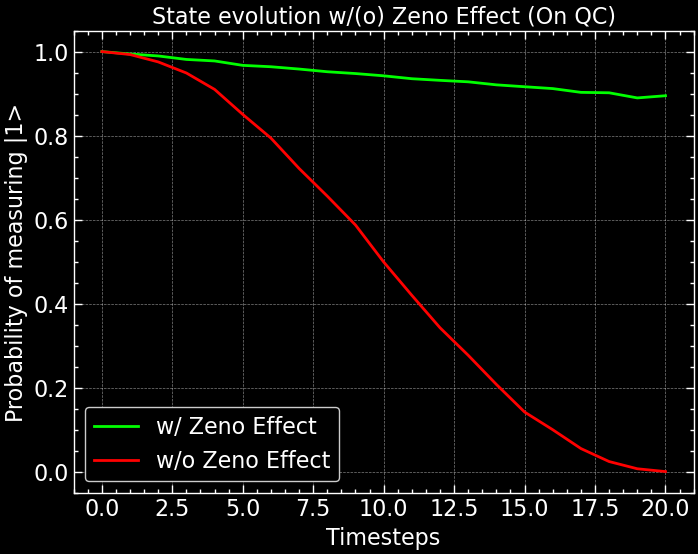

In [56]:
x_v_zeno = range(timesteps + 1)
y_v_zeno = list()

#IBMQ.load_account()

provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmq_qasm_simulator')

for timestep in range(timesteps + 1):
    qc_zeno = QuantumCircuit(qr, cr)
    qc_zeno.x(0)

    for time_step in range(timestep):
        qc_zeno.measure(qr[0], cr[0])
        qc_zeno.append(RXGate(theta), [qr[0]])

    qc_zeno.measure(qr[0], cr[0])

    shots = 10000
    job = simulator.run(qc_zeno, backend = device, shots = shots)
    counts = job.result().get_counts()
        
    if '1' in counts:
        y_v_zeno.append(counts['1'] / shots)
    else:
        y_v_zeno.append(0)

plt.plot(x_v_zeno, y_v_zeno, color = 'lime', label = 'w/ Zeno Effect')
plt.plot(x_v, y_v, color = 'red', label = 'w/o Zeno Effect')   

plt.legend(['w/ Zeno Effect', 'w/o Zeno Effect'])
plt.xlabel('Timesteps')
plt.ylabel('Probability of measuring |1>')
plt.title('State evolution w/(o) Zeno Effect (On QC)')

# A Quantum Freezer Game:

In [63]:
def freezer():
    qubits = int(input("Enter the number of qubits: "))
    timesteps = int(input("Enter the number of timesteps: "))

    qr = QuantumRegister(1, 'q')
    cr = ClassicalRegister(timesteps, 'c')
    theta = np.pi / timesteps

    qc_freezer = QuantumCircuit(qr, cr)
    qc_freezer.x(0)

    for timestep in range(timesteps):
        qc_freezer.append(RXGate(theta), [qr[0]])
        qc_freezer.measure(qr[0], cr[timestep])

    simulator = AerSimulator()
    job = simulator.run(qc_freezer, shots = qubits)
    counts = job.result().get_counts()

    if '1' * timesteps in counts:
        print('Successfully froze', counts['1' * timesteps], 'out of', qubits, 'qubits!')
    else:
        print('Freeze failed. Try increasing timesteps!')

freezer()

Successfully froze 4 out of 4 qubits!


# Freezing Entangled Qubits:

For instance, can we preserve entanglement of two maximally entangled qubits?

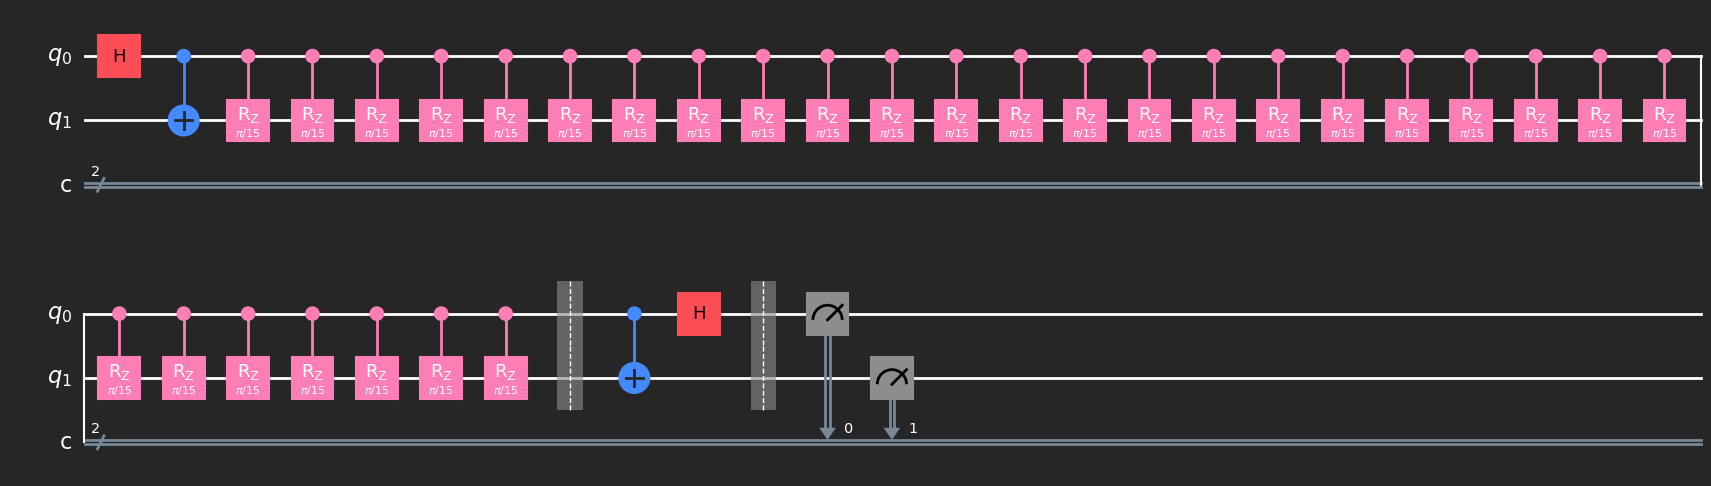

In [65]:
timesteps = int(input("Enter the number of timesteps: "))
theta = 2 * np.pi / timesteps

qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc_bell = QuantumCircuit(qr, cr)

qc_bell.h(0)
qc_bell.cx(0, 1)

for timestep in range(timesteps):
    qc_bell.append(CRZGate(theta), [qr[0], qr[1]])

qc_bell.barrier()
qc_bell.cx(0, 1)
qc_bell.h(0)

qc_bell.barrier()
qc_bell.measure(qr, cr)
qc_bell.draw('mpl', style = 'iqx-dark')

# An Entangled Qubit Freezer Game:

In [71]:
def entangled_freezer():
    qubits = int(input("Enter the number of qubits: "))
    timesteps = int(input("Enter the number of timesteps: "))

    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(2 * timesteps, 'c')
    theta = 2 * np.pi / timesteps
    
    qc_efreezer = QuantumCircuit(qr, cr)
    qc_efreezer.h(0)
    qc_efreezer.cx(0, 1)

    for timestep in range(timesteps):
        qc_efreezer.append(CRZGate(theta), [qr[0], qr[1]])
        qc_efreezer.cx(0, 1)
        qc_efreezer.h(0)

        qc_efreezer.measure(qr[0], cr[timestep])
        qc_efreezer.measure(qr[1], cr[timestep + timesteps])
        
        qc_efreezer.h(0)
        qc_efreezer.cx(0, 1)

    simulator = AerSimulator()
    job = execute(qc_efreezer, simulator, shots = qubits)
    counts = job.result().get_counts()

    if '00' * timesteps in counts:
        print('Successfully froze', counts['00' * timesteps], 'out of', qubits, 'bell pairs!')
    else:
        print('Freeze failed. Try increasing timesteps!')

entangled_freezer()

Successfully froze 86 out of 100 bell pairs!


This effect has been proposed as a poential solution to Quantum Error Correction, as continuous measurement of an entangled pair of qubits can **prevent decoherence.**